The objective is predicting store sales using historical markdown data.
One challenge of modelling retail data is the need to make decisions based on limited
history. If Christmas comes but once a year, so does the chance to see how strategic
decisions impacted the bottom line.

In [57]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime as dt
from sklearn.metrics import mean_squared_error

In [58]:
# %cd set your location 

E:\MLAI classes\projects\project 2\data


In [59]:
#calling all CSV.
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Explore the data.

In [60]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [61]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [62]:
#finding null values
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [63]:
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

# CLEANING

In [64]:
import statistics

In [65]:
#filling null value by mean and zero for markdowns
mean_v=feature['Unemployment'].mean()
mean_c=feature['CPI'].mean()
feature['Unemployment']=feature['Unemployment'].fillna(mean_v)
feature['CPI'] = feature['CPI'].fillna(mean_v)
feature['MarkDown1'] = feature['MarkDown1'].fillna(0)
feature['MarkDown2'] = feature['MarkDown2'].fillna(0)
feature['MarkDown3'] = feature['MarkDown3'].fillna(0)
feature['MarkDown4'] = feature['MarkDown4'].fillna(0)
feature['MarkDown5'] = feature['MarkDown5'].fillna(0)

In [66]:
mean_v

7.826821038790305

In [67]:
mean_c

172.46080918276078

In [68]:
feature['MarkDown1']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
8185    4842.29
8186    9090.48
8187    3789.94
8188    2961.49
8189     212.02
Name: MarkDown1, Length: 8190, dtype: float64

In [69]:
feature.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,False


In [70]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


MERGING data set

In [71]:
data = pd.merge(feature, train, on=['Store','Date','IsHoliday'], how='inner')

In [72]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


In [73]:
data1 = pd.merge(data, store, how='inner',on=['Store'])

In [74]:
data1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [75]:
data1 = data1.sort_values(by='Date')

In [76]:
data1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681


In [77]:
#catagorical coversion
tp = pd.get_dummies(data1.Type)
data1 = pd.concat([data1, tp], axis=1)
data1 = data1.drop(columns='Type')

In [78]:
data1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,A,B,C
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,151315,1,0,0
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,103681,0,1,0
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,103681,0,1,0
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,103681,0,1,0
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,103681,0,1,0


In [79]:
print('sales on non-holiday : ',data[data['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',data[data['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


[]

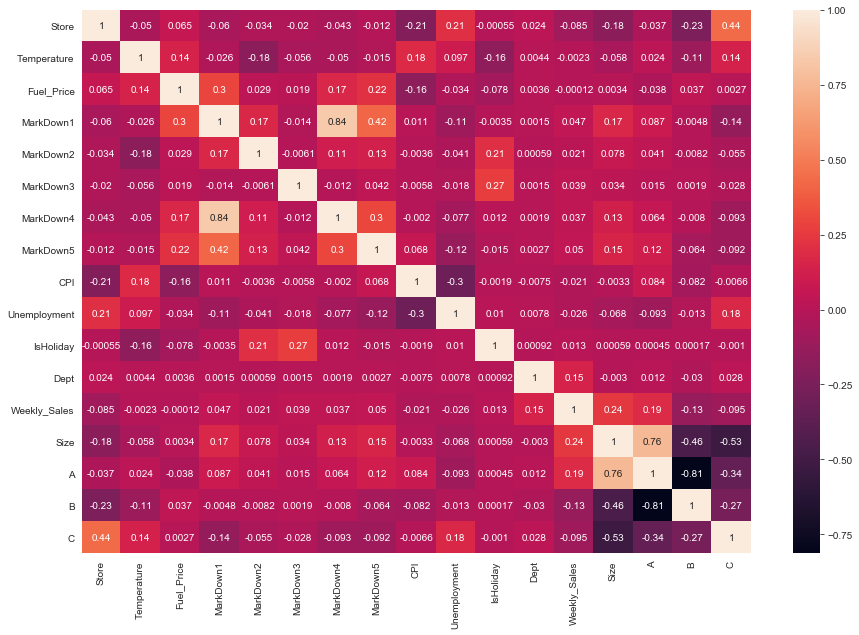

In [80]:
#assumption check.
corr = data1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [81]:
data1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,A,B,C
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,151315,1,0,0
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,103681,0,1,0
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,103681,0,1,0
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,103681,0,1,0
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,103681,0,1,0


In [82]:
# Add year
data1["Year"] = pd.to_datetime(data1["Date"], format="%Y-%m-%d").dt.year
data1["Year"] = pd.to_datetime(data1["Date"], format="%Y-%m-%d").dt.year
# Add  day
data1["Day"] = pd.to_datetime(data1["Date"], format="%Y-%m-%d").dt.day
data1["Day"] = pd.to_datetime(data1["Date"], format="%Y-%m-%d").dt.day
# Add  next Christmas
data1["Days to Next Christmas"] = (pd.to_datetime(data1["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(data1["Date"], format="%Y-%m-%d")).dt.days.astype(int)
data1["Days to Next Christmas"] = (pd.to_datetime(data1["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(data1["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [83]:
data1 = data1.drop(columns='Date')

In [92]:
data1.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,A,B,C,Year,Day,Days to Next Christmas
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,151315,1,0,0,2010,5,329
330761,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,103681,0,1,0,2010,5,329
330762,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,103681,0,1,0,2010,5,329
330763,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,103681,0,1,0,2010,5,329
330764,35,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,103681,0,1,0,2010,5,329


# Spliting into train 80% and test 20%

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(data1,data1['Weekly_Sales'],test_size =0.2,random_state=32)

In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)

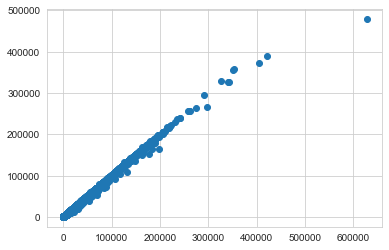

In [86]:
plt.scatter(test_y,pred_y)
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(test_y, pred_y))
print(np.sqrt(mean_squared_error(test_y, pred_y)))
print(mean_squared_error(test_y, pred_y))
accuracy=knn.score(test_x, test_y)
print(accuracy)

138.746647496264
717.220452809658
514405.17792849086
0.999010979622933


In [88]:
Linear = linear_model.LinearRegression(normalize=True)
Linear.fit(train_x, train_y)
pred_y = Linear.predict(test_x)

In [89]:
print(mean_absolute_error(test_y, pred_y))
print(np.sqrt(mean_squared_error(test_y, pred_y)))
print(mean_squared_error(test_y, pred_y))
accuracy=Linear.score(test_x, test_y)
print(accuracy)

1.6854278478520934e-10
2.4168544653892806e-10
5.841185506872105e-20
1.0


In [90]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(train_x,train_y)
pred_y = dt.predict(test_x)

In [91]:
print(mean_absolute_error(test_y, pred_y))
print(np.sqrt(mean_squared_error(test_y, pred_y)))
print(mean_squared_error(test_y, pred_y))
accuracy=dt.score(test_x, test_y)
print(accuracy)

2.6370547002870173
241.77990967323757
58457.524721598915
0.9998876067239926



------------------------END